In [31]:
# Para hacer los ejemplos vamos a usar la base de datos de arbolado
import pandas as pd

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_11376\1598610678.py:5: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [32]:
lista_especies = ["Photinia x fraseri", "Populus nigra"]#,"Cupressus sp."]
arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='long', ylabel='lat'>

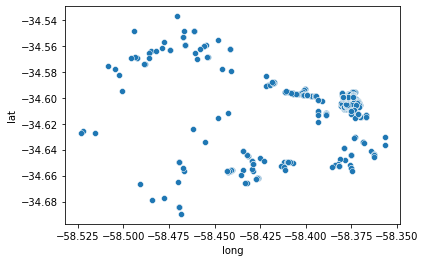

In [34]:
sns.scatterplot(data=arbolado, x='long', y='lat')

<AxesSubplot:xlabel='long', ylabel='lat'>

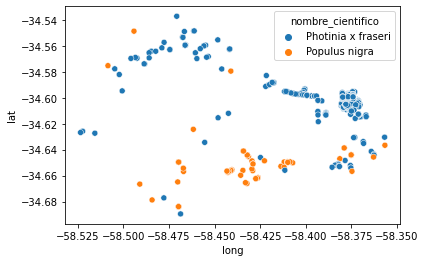

In [35]:
sns.scatterplot(data=arbolado, x='long', y='lat', hue='nombre_cientifico')

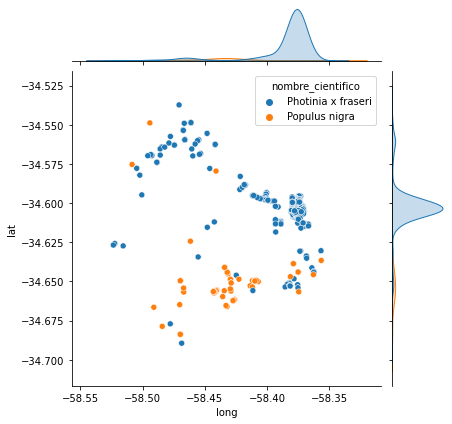

In [36]:
sns.jointplot(data=arbolado, x='long', y='lat', hue='nombre_cientifico')

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

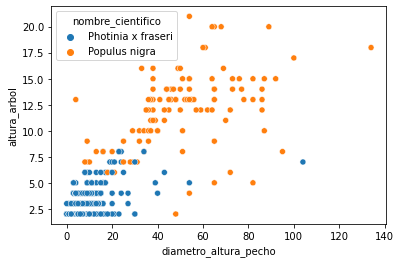

In [37]:
sns.scatterplot(data=arbolado, x='diametro_altura_pecho', y='altura_arbol', hue='nombre_cientifico')

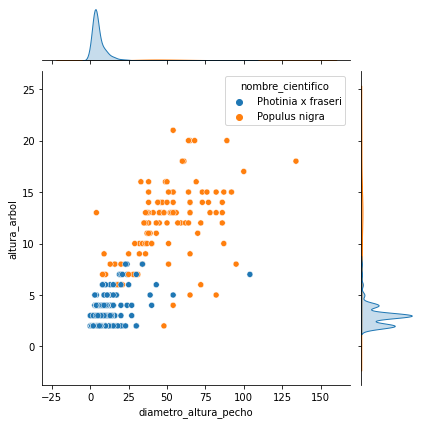

In [38]:
sns.jointplot(data=arbolado, x='diametro_altura_pecho', y='altura_arbol', hue='nombre_cientifico')

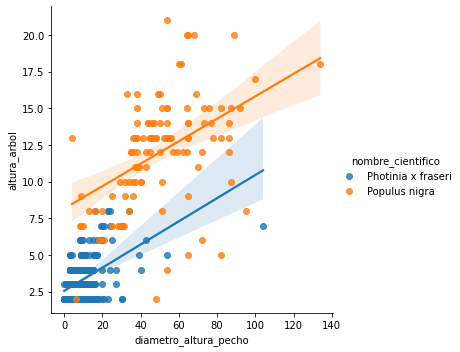

In [39]:
ax = sns.lmplot(y="altura_arbol", x="diametro_altura_pecho", data=arbolado, hue='nombre_cientifico')

In [40]:
arbolado['nombre_cientifico'].value_counts(normalize=True)

Photinia x fraseri    0.873589
Populus nigra         0.126411
Name: nombre_cientifico, dtype: float64

# Propuesta de actividad

- Armar un modelos de NB para clasificar los arboles. 
- Usar las caracteristicas long-lat, altura-diametro y todo junto. 
- Comparar metricas. 

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [42]:
# Breve limpieza
arbolado.isna().sum()
arbolado.dropna(inplace=True)

In [43]:
model = GaussianNB()
X = arbolado.drop(columns=['nombre_cientifico'])
#X = arbolado.drop(columns=['nombre_cientifico','long','lat'])
#X = arbolado.drop(columns=['nombre_cientifico','altura_arbol','diametro_altura_pecho'])
y = arbolado['nombre_cientifico']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
model.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred = model.predict(X_test)
y_pred

array(['Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Populus nigra',
       'Populus nigra', 'Photinia x fraseri', 'Populus nigra',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Populus nigra',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Populus nigra', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fraseri', 'Photinia x fraseri', 'Photinia x fraseri',
       'Photinia x fraseri', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fraseri', 'Populus nigra', 'Photinia x fraseri',
       'Photinia x fras

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9805825242718447

In [47]:
# Comparar con algun otro modelo.

# Clustering

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [49]:
kmeans = KMeans(n_clusters=2)
scaler=StandardScaler()

In [50]:
#X = arbolado.drop(columns=['nombre_cientifico'])
#X = arbolado.drop(columns=['nombre_cientifico','long','lat'])
X = arbolado.drop(columns=['nombre_cientifico','altura_arbol','diametro_altura_pecho'])
X_sc = scaler.fit_transform(X)

In [51]:
kmeans.fit(X_sc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

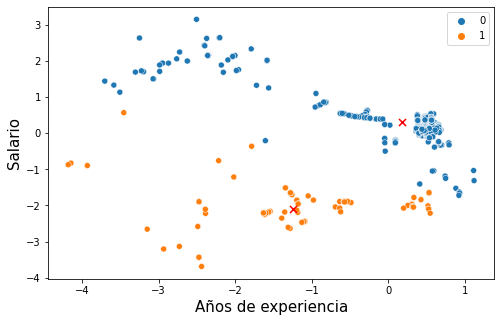

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_sc[:,0],y=X_sc[:,1],hue=labels,legend='full')
plt.xlabel('Años de experiencia',fontsize=15)
plt.ylabel('Salario',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='r')

# Un ejemplo donde las cosas no funcionan!

In [53]:
arboles['nombre_cientifico'].value_counts()[20:30]

Ceiba speciosa                1796
Citrus limon                  1709
Ailanthus altissima           1639
Ficus benjamina variegata     1574
Acer buergerianum             1547
Bauhinia forficata            1449
Acer saccharinum              1372
Handroanthus impetiginosus    1365
Eriobotrya japonica           1317
Populus deltoides             1256
Name: nombre_cientifico, dtype: int64

In [54]:
lista_especies = ["Platanus x acerifolia", "Citrus limon"]
#arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico","diametro_altura_pecho","altura_arbol"]]
arbolado = arboles[arboles["nombre_cientifico"].isin(lista_especies)][["long","lat","nombre_cientifico"]]
arbolado.dropna(inplace=True)

<AxesSubplot:xlabel='long', ylabel='lat'>

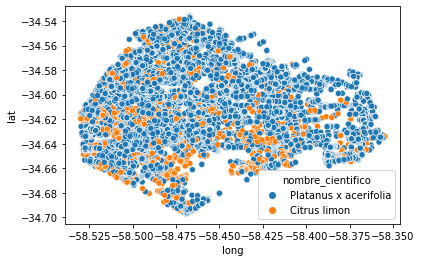

In [55]:
sns.scatterplot(data=arbolado, x='long', y='lat', hue='nombre_cientifico')

In [56]:
model = GaussianNB()
X = arbolado.drop(columns=['nombre_cientifico'])
y = arbolado['nombre_cientifico']
X_train, X_test, y_train, y_test = train_test_split(X, y)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9499752352649826

In [57]:
y.value_counts(normalize=True)

Platanus x acerifolia    0.949351
Citrus limon             0.050649
Name: nombre_cientifico, dtype: float64

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[   0,  404],
       [   0, 7672]], dtype=int64)

Text(33.0, 0.5, 'Real')

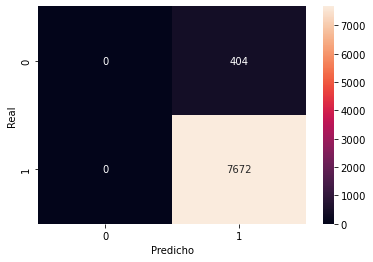

In [59]:
g = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
g.set_xlabel('Predicho')
g.set_ylabel('Real')